<a href="https://colab.research.google.com/github/garciakm/proyecto_integrado_2c/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt:  necesito solicitarte que me arme un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares argentinas
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Artes", "Música", "Formación Ética y Ciudadana",
    "Tecnología", "Educación para la Ciudadanía", "Biología", "Física", "Química"
]

# Función para generar datos aleatorios para un alumno
def generar_datos_alumno():
  apellido = "Apellido" + str(random.randint(1, 1000))  # Apellidos al azar
  nombre = "Nombre" + str(random.randint(1, 1000))  # Nombres al azar
  dni = random.randint(10000000, 99999999)  # DNI al azar
  materia = random.choice(materias)
  nota1 = random.randint(1, 10)
  nota2 = random.randint(1, 10)
  nota3 = random.randint(1, 10)
  faltas = random.randint(0, 20)  # Faltas aleatorias (hasta 20)
  return [apellido, nombre, dni, materia, nota1, nota2, nota3, faltas]


# Crear DataFrame con 100 filas de datos aleatorios
data = []
for _ in range(100):
  data.append(generar_datos_alumno())

df = pd.DataFrame(data, columns=[
    "Apellido", "Nombre", "Nro_DNI", "Materia Escolar", "Nota 1er Trimestre",
    "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a clases"
])

df

,Apellido,Nombre,Nro_DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Apellido507,Nombre430,67388829,Inglés,10,9,9,19
1,Apellido291,Nombre89,96696755,Artes,9,7,1,18
2,Apellido109,Nombre983,11431076,Geografía,7,4,8,20
3,Apellido410,Nombre597,84069829,Química,9,10,3,9
4,Apellido191,Nombre427,96229657,Música,10,3,6,3
...,...,...,...,...,...,...,...,...
95,Apellido751,Nombre679,65386755,Biología,9,2,5,14
96,Apellido139,Nombre558,35259602,Ciencias Naturales,8,7,1,0
97,Apellido532,Nombre681,40689986,Matemática,10,9,8,19
98,Apellido59,Nombre783,43872155,Educación Física,2,1,7,13


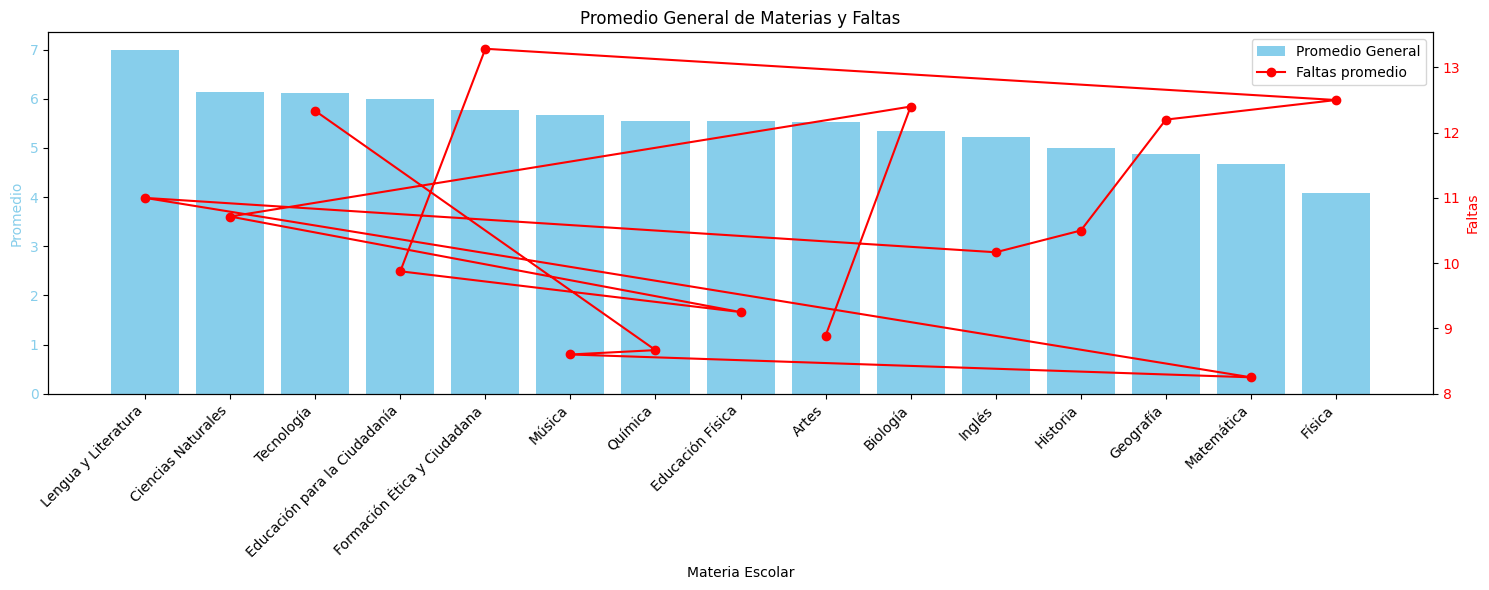

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


# Lista de materias escolares argentinas (igual que antes)
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Artes", "Música", "Formación Ética y Ciudadana",
    "Tecnología", "Educación para la Ciudadanía", "Biología", "Física", "Química"
]

# Función para generar datos aleatorios para un alumno (igual que antes)
def generar_datos_alumno():
  apellido = "Apellido" + str(random.randint(1, 1000))  # Apellidos al azar
  nombre = "Nombre" + str(random.randint(1, 1000))  # Nombres al azar
  dni = random.randint(10000000, 99999999)  # DNI al azar
  materia = random.choice(materias)
  nota1 = random.randint(1, 10)
  nota2 = random.randint(1, 10)
  nota3 = random.randint(1, 10)
  faltas = random.randint(0, 20)  # Faltas aleatorias (hasta 20)
  return [apellido, nombre, dni, materia, nota1, nota2, nota3, faltas]


# Crear DataFrame con 100 filas de datos aleatorios (igual que antes)
data = []
for _ in range(100):
  data.append(generar_datos_alumno())

df = pd.DataFrame(data, columns=[
    "Apellido", "Nombre", "Nro_DNI", "Materia Escolar", "Nota 1er Trimestre",
    "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a clases"
])

# Calcular el promedio de cada materia
promedios_materias = df.groupby("Materia Escolar")[["Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre"]].mean().mean(axis=1)
promedios_materias = promedios_materias.sort_values(ascending=False)

# Calcular las faltas promedio por materia
faltas_promedio = df.groupby("Materia Escolar")["Faltas a clases"].mean()

# Crear el gráfico de barras
fig, ax1 = plt.subplots(figsize=(15, 6))

# Barras para los promedios
ax1.bar(promedios_materias.index, promedios_materias.values, color="skyblue", label="Promedio General")
ax1.set_xlabel("Materia Escolar")
ax1.set_ylabel("Promedio", color="skyblue")
ax1.tick_params(axis="y", labelcolor="skyblue")
ax1.set_title("Promedio General de Materias y Faltas")
plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje x


# Segundo eje para las faltas
ax2 = ax1.twinx()
ax2.plot(faltas_promedio.index, faltas_promedio.values, color="red", marker="o", label="Faltas promedio")
ax2.set_ylabel("Faltas", color="red")
ax2.tick_params(axis="y", labelcolor="red")


# Agregar leyendas
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper right")

plt.tight_layout()
plt.show()

In [3]:
df.to_csv("datos_alumnos.csv", index=False)
